<a href="https://colab.research.google.com/github/vedantdave77/project.Orca/blob/master/Project/project-dog_Breed_CNN_Classification/Dog_Classification_Project%5BTransfer_Learning%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objective : classify dog_breed with Transfer-learning AND compare different pretrained algorithms
---
#### (even human relate to dog breed?, just for fun)

In this notebook, I will make  an algorithm that could be used as part of a mobile or web app. At the end of this project, your code will accept any user-supplied image as input. If a dog is detected in the image, it will provide an estimate of the dog's breed. If a human is detected, it will provide an estimate of the dog breed that is most resembling.

### Do you know the breed of this Dog?

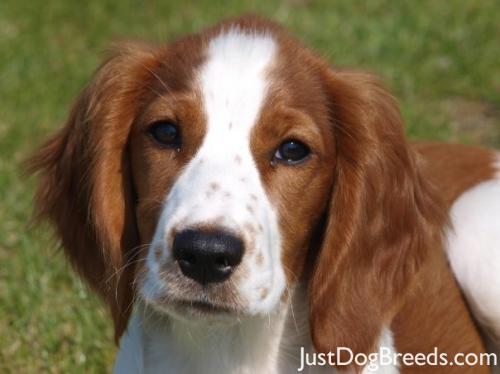

In [17]:
from IPython.display import Image,display 
display(Image('/content/drive/My Drive/images/Welsh_springer_spaniel_08203.jpg'))

### I know, its hard to tell,but Neural Network can do it. Let's ask Neural_Net. for this solution.

---

I break the notebook into separate steps. Feel free to use the links below to navigate the notebook.

1. Import Datasets
2. Detect Humans faces - used cv2  *.xlm scripts
3. Detect Dogs
4. Transfer Learning [vgg16] - .json file format
5. Accuracy Checking
6. Tansfer Learning algorithms Comparison 
   > - vgg16, vgg16_bn, inception v3, resnet18, resnet152, alexnet, 
7. Visuzlize Result.

---


## [Step 0] Import data and make directory 

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `Data/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `Data/lfw`.

> I am using a google drive. You can download data from my drive [setup](https://drive.google.com/drive/folders/1w4YfTwN-WqtFa2eNwj6Mb3Cxwj9HeU_T?usp=sharing)

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/content/drive/My Drive/Data /lfw/*/*"))
dog_files = np.array(glob("/content/drive/My Drive/Data /dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13234 total human images.
There are 8351 total dog images.


#### Now Let's pre analyze datasets and get the info about its lenght and categories

In [20]:
# List of Dog breed names
dog_names = [dogs for dogs in sorted(glob("/content/drive/My Drive/Data /dogImages/train/*"))]
print(dog_names[0:5])
len(dog_names)

['/content/drive/My Drive/Data /dogImages/train/001.Affenpinscher', '/content/drive/My Drive/Data /dogImages/train/002.Afghan_hound', '/content/drive/My Drive/Data /dogImages/train/003.Airedale_terrier', '/content/drive/My Drive/Data /dogImages/train/004.Akita', '/content/drive/My Drive/Data /dogImages/train/005.Alaskan_malamute']


133

In [21]:
# print statistics about the dataset
print('There are %d total dog categories.' % len(dog_names))
print('There are %s total dog images.\n' % len(glob("/content/drive/My Drive/Data /dogImages/*/*/*")))                        # data_ instad of data (bug)
print('There are %d training dog images.' % len(glob("/content/drive/My Drive/Data /dogImages/train/*/*")))
print('There are %d validation dog images.' % len(glob("/content/drive/My Drive/Data /dogImages/valid/*/*")))    
print('There are %d test dog images.'% len(glob("/content/drive/My Drive/Data /dogImages/test/*/*")))

There are 133 total dog categories.
There are 8351 total dog images.

There are 6680 training dog images.
There are 835 validation dog images.
There are 836 test dog images.


In [22]:
print(human_files[0])

/content/drive/My Drive/Data /lfw/Chuck_Hagel/Chuck_Hagel_0001.jpg


## Detect Humans 

#### In this section, I use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 2
[[[174 115  81]
  [175 116  82]
  [175 116  82]
  ...
  [ 87  30  13]
  [ 84  27  16]
  [ 76  22  12]]

 [[174 115  81]
  [175 116  82]
  [175 116  82]
  ...
  [ 89  32  15]
  [ 86  29  18]
  [ 80  26  16]]

 [[174 115  81]
  [175 116  82]
  [175 116  82]
  ...
  [ 90  33  16]
  [ 88  31  20]
  [ 82  28  18]]

 ...

 [[213 168 149]
  [213 168 147]
  [213 168 147]
  ...
  [133 109  75]
  [133 109  75]
  [132 108  74]]

 [[213 168 149]
  [213 168 147]
  [213 168 147]
  ...
  [131 108  74]
  [131 108  74]
  [131 108  74]]

 [[213 168 149]
  [213 168 147]
  [213 168 147]
  ...
  [131 108  74]
  [130 107  73]
  [130 107  73]]]


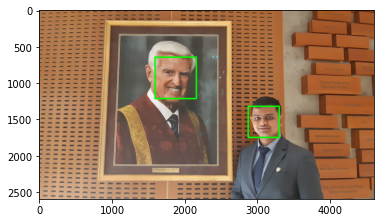

In [23]:
# print statistics of human dataset
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# feature extraction (as discussed before, I will use the .xml file for extraction, pre-trained face detection feauture extraction)
face_cascade = cv2.CascadeClassifier('/content/drive/My Drive/haarcascades/haarcascade_frontalface_alt.xml')

# Load color images
img = cv2.imread("/content/drive/My Drive/Data /lfw/Aaron_Eckhart/Vedant_Dave_0001.jpg")                                         ## imread from list is not working
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)                    # gray scale conversion

faces = face_cascade.detectMultiScale(gray)                     # face detection (finding faces)

print('Number of faces detected:', len(faces))                  # total detected faces from files's first file

# make square boundary box for all faces
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),20)              # here box will be red (255,0,0) ==> (B,G,R)

    
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)                  # convert gray image to rgb for ploting

plt.imshow(cv_rgb)
print(cv_rgb)
plt.show()

In [24]:
print(gray)                                                        # if we do print(img) it still in 3 color channel

[[129 130 130 ...  45  43  37]
 [129 130 130 ...  47  45  41]
 [129 130 130 ...  48  47  43]
 ...
 [179 179 179 ... 112 112 111]
 [179 179 179 ... 111 111 111]
 [179 179 179 ... 111 110 110]]


### Explainations: 

#### Here, the type of images are numpy as we can see above, it has 1 D array with 4 parameters and they starts from image gray scalling so 3D image converts to 1D (only in gray), then I apply rectangle with x,y as our code focus. then, I apply w andh to define the boundary of rectangel to fit on the faces



---

Here, first I want to implement human face detector and want to check our model. After that I will generate algorithm for deg breeds classification. Because, **Human detection is classification of 2 classes (Yes or No). But, for dog breed classification we have 133 classes so, may be we need toooooooooooooo much deep network!. 

I also have plant to use **pretrained model as Transfer learning methodology.**

So, our combined goal becomes **Identifying human of Dog and their relevant breed**, means if we have human, we will get the relevant dog breed for the same face.

> Write function if you need to use same code more than 3 times! 

---

## Create Human_detector function

In [25]:
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces)>0                                            # this will return no. of faces and 
                                                                 ## if we use len(faces) > 0 then we will get the boolean return

In [26]:
# check above functions
def detect_faces(img_path):
    faces_detected = np.zeros(len(img_path))                      # generate zero array with total faces
    for i in range(len(img_path)):
        faces_detected[i] = face_detector(img_path[i])            # count faces detected to specific image[i]
    return faces_detected

In [27]:
from tqdm import tqdm

human_files_short = human_files[:100]                            # pick first 100 images for testing
dog_files_short = dog_files[:100]                                # pick first 100 images for testing pretrained detector 

## NOTE ## here, value from 100 actually give us randomsome percentage value (acceptable level)

# checking
faces_detected_human = detect_faces(human_files_short)
faces_detected_dog = detect_faces(dog_files_short)

In [28]:
print(f"{np.mean(faces_detected_human)*100:.3f}% of human faces found")             
print(f"{np.mean(faces_detected_dog)*100:.3f}% of dogs confused with humans")

99.000% of human faces found
8.000% of dogs confused with humans


#### Here, 106% due to more than one face per images, and  10 % actually look like dog for Neural_Net.

Let's check for more images to ensure about the performance...

In [ ]:
faces_detected_human = detect_faces(human_files[:5000])
print(f"{np.mean(faces_detected_human)*100:.3f}% of human faces found") 

98.940% of human faces found


In [ ]:
faces_detected_human = detect_faces(dog_files[:5000])
print(f"{np.mean(faces_detected_dog)*100:.3f}% of dogs confused with humans")

7.000% of dogs confused with humans


### Conclusion:

OpenCV's pretrained model give best answer for human detection, but worst for dog_detection. But, here our human are distinguished from dog only as we have pure dataset under directory. In real scenario if we want to detect human then our main aim must be to distinguished human from everything. Also here, our True Positive results are best but False Negative is not that much good. For that we need dog_detector. 

---

## [Step 2] Detect Dogs

**Dog_datasets has 133 different breeds**, so its hard to define network, and as we know there is **no readymade xml file which give use leverage of pre-trainind  model.** 

*But, there is another technique called **transfer learning.** I mean... use pretrained network such as VGG-16, VGG-19, DenseNet and others. The idea behind it is to detect images features from welknown CNN, and as you know first primary layers of CNN always detect edges and common patterns of the images, we can use them with dog images. At any layer we should cut the original network and join our logical network or last layer of classifier to modify result according to our desire output. In this case, the output will be 133 as we have 133 different breeds.* 



---

### Obtain Pre-trained **VGG-16 Model**

The code cell below downloads the VGG-16 model, along with weights that have been trained on **ImageNet**, a very large, very popular dataset used for image classification and other vision tasks. ImageNet contains over **10 million URLs, each linking to an image containing an object from one of 1000 categories.**, Our task is with 133, less than 1000 so, we can aspect better resutl from VGG-16.

### Let's Start Transfer Learning

In [44]:
import torch
import torchvision.models as   models

# define VGG-16 model for transfer learning
vgg16 = models.vgg16(pretrained = True)                                         # true will give us pretrained model with layer by layer feature output. (so we are not only define network, but also want to use its extraction)

# but, how can we define that this will give the best ourput, so its better to use other models such as alexnet, resnet18, resnet152, inception_v3 from google brain 
 
vgg16_bn = models.vgg16_bn(pretrained=True)                                     # batch normalization
alexnet = models.alexnet(pretrained=True)                                       # alexnet - by Alex Krizhevsky, for ImageNet Large Scale Visual Recognition Challenge on September 30, 2012
resnet18 = models.resnet18(pretrained=True)                                     # deep residual concept introduced by Kaiming He, Xiangyu Zhang, Shaoqing Ren, Jian Sun in 2015 (18 deep layers)
resnet152 = models.resnet152(pretrained=True)                                   # same but with 152 deep layers (8 times more deeper than vgg, so aspecting high accuracy)
inception_v3 = models.inception_v3(pretrained=True)                             # its from movie concept inception from 2012 and has internal closed loop structures and max pooling layers represented by google brain team
squeezenet = models.squeezenet1_0(pretrained=True)
densenet = models.densenet161(pretrained=True)
googlenet = models.googlenet(pretrained=True)
shufflenet = models.shufflenet_v2_x1_0(pretrained=True)
mobilenet = models.mobilenet_v2(pretrained=True)
resnext50_32x4d = models.resnext50_32x4d(pretrained=True)
wide_resnet50_2 = models.wide_resnet50_2(pretrained=True)
mnasnet = models.mnasnet1_0(pretrained=True)

# make list of all models in evalution mode for later use

model_list = [alexnet.eval(),vgg16.eval(),vgg16_bn.eval(),resnet18.eval(),resnet152.eval(),inception_v3.eval(),squeezenet1_0.eval(),densenet161.eval(),googlenet.eval(),shufflenet_v2_x1_0.eval(),mobilenet_v2.eval(),resnext50_32x4d.eval(),wide_resnet50_2.eval(),mnasnet1_0.eval()]
model_names = ["alexnet","vgg16","vgg16_bn","resnet18","resnet152","inception_v3","squeezenet1_0","densenet161","googlenet","shufflenet_v2_x1_0","mobilenet_v2","resnext50_32x4d","wide_resnet50_2","mnasnet1_0"]

Downloading: "https://download.pytorch.org/models/squeezenet1_0-a815701f.pth" to /root/.cache/torch/checkpoints/squeezenet1_0-a815701f.pth


Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /root/.cache/torch/checkpoints/densenet161-8d451a50.pth


Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/checkpoints/googlenet-1378be20.pth


Downloading: "https://download.pytorch.org/models/shufflenetv2_x1-5666bf0f80.pth" to /root/.cache/torch/checkpoints/shufflenetv2_x1-5666bf0f80.pth


Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/checkpoints/mobilenet_v2-b0353104.pth


Downloading: "https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth" to /root/.cache/torch/checkpoints/resnext50_32x4d-7cdf4587.pth


Downloading: "https://download.pytorch.org/models/wide_resnet50_2-95faca4d.pth" to /root/.cache/torch/checkpoints/wide_resnet50_2-95faca4d.pth


Downloading: "https://download.pytorch.org/models/mnasnet1.0_top1_73.512-f206786ef8.pth" to /root/.cache/torch/checkpoints/mnasnet1.0_top1_73.512-f206786ef8.pth


NameError: ignored

In [ ]:
Not now, so I am here to create error> :)

squeezenet = models.squeezenet1_0(pretrained=True)
densenet = models.densenet161(pretrained=True)
googlenet = models.googlenet(pretrained=True)
shufflenet = models.shufflenet_v2_x1_0(pretrained=True)
mobilenet = models.mobilenet_v2(pretrained=True)
resnext50_32x4d = models.resnext50_32x4d(pretrained=True)
wide_resnet50_2 = models.wide_resnet50_2(pretrained=True)
mnasnet = models.mnasnet1_0(pretrained=True)

In [29]:
# check cuda for fast computation. 

use_cuda = torch.cuda.is_available()
if not use_cuda:
  print('CUDA is not available so run on cpu or enable gpu not tpu  from colab runtime incase of colab and run this cell again')
  device = 'cpu'
else:
  print('CUDA is available. Training is accelerated')
  device = torch.device('cuda:0')
  print('Using', torch.cuda.get_device_name(device))

vgg16 = vgg16.to(device)

CUDA is available. Training is accelerated
Using Tesla P100-PCIE-16GB


Now, we have our model on the instace, so its time to predict our data output from pretrained model. 

These network (CNN) specially working with tensors, so first I will convert tensor to data (image,as we store data in tensor form with numpy) and then I will repreat the same procedure by making some relevant functions.

To convert data to tensor please use pytorch's [documentation](https://pytorch.org/docs/stable/tensors.html). Specially, how to copy data and making tensor part. What are the procedure to copy tensor with same length with different data.

In [30]:
# convert tensor to image data type for display
def convert_dataToTensor(tensor):
  data = tensor.to("cpu").clone().detach()                                      # .clone.detach() used for readout data and avoid to copy [to save space]
  data = data.numpy().squeeze()                                                 # unflattening
  data = data.transpose(1,2,0)                                                  # in gray image
  image = data * np.array((0.229,0.224,0.225)) + np.array((0.485,0,456,0.406))      # data * norm_std + norm_mean ===> data normalization.                              #### EROOR : () vs (())
  image = image.clip(0,1)                                                       # .clip is numpy function so, (value<0 => 0) and (value>1 => 1) 
  return image

In [31]:
# display image form path  # here, colab has different appraoch with cv2.imread(), that only accept image path not from list. 
def show_image_from_path(img_path, title = None):
    img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])
    if title is not None:
        plt.gca().set_title(title)
    plt.show()

In [32]:
# predefined parameters 
norm_mean = [0.485, 0.456, 0.406]
norm_std = [0.229, 0.224, 0.225]
img_short_side_resize = 256
img_input_size = 224
shuffle = True
num_workers = 16
batch_size = 64

In [33]:
from PIL import Image
import torchvision.transforms as transforms
import json
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

class_idx = json.load(open('/content/drive/My Drive/Data /imagenet_class_index.json'))                        # json format of imagenet data class name (1000 classes - labels)
idx2label = [class_idx[str(k)][1] for k in range(len(class_idx))]               # json format consist, as an example: , "996": ["n13052670", "hen-of-the-woods"] and we want hen-of-the-woods. 

def model_predict(img_path,model,device): 
  image = Image.open(img_path).convert('RGB')
  in_transform = transforms.Compose([
                                     transforms.Resize(img_short_side_resize),
                                     transforms.FiveCrop(img_input_size),
                                     transforms.Lambda(lambda crops: torch.stack([transforms.Compose([
                                                                                                      transforms.ToTensor(),
                                                                                                      transforms.Normalize(mean=norm_mean, std = norm_std)])(crop) for crop in crops]))])
  output =  torch.argmax(model(in_transform(image).to(device)).mean(0))
  return output.to("cpu").item() 


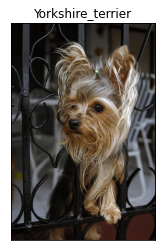

In [34]:
# make prediction with transfer learning
test_image = dog_files_short[0]
pred = model_predict(test_image, vgg16, device)
show_image_from_path(test_image,title = idx2label[pred])

Now, the question is how this algorihtm predict dog directly, even without giving our modified dog classes?, the answer is hiding in ImageNet ownself. If you observe the json file you download,then the index from 151 to 168 are related to dogs.

---

Our pretrained easily found the dog breed name, but **What about the accuracy of algorithm?**

---

> Well, we have two kind of datasets with pure data inside. So, if we know how much accuracy algorithm has for dog and human dataset for dog classification, will give us accuracy of algorithm. 

In [35]:
# define dog_detector... 
def dog_detector(img_path,model,device):
  out = model_predict(img_path,model,device)                                    ## bug detected, model was static, solved...
  return out>=151 and out<=268 

In [36]:
# check the real accuracy of dog_classification from vgg16. 
dogs_detected_correctly = [dog_detector(img_path,vgg16,device) for img_path in dog_files_short]                         # I use short file to predict quickly ...
dogs_detected_incorrectly = [dog_detector(img_path,vgg16,device) for img_path in human_files_short]

true_positive = np.mean(dogs_detected_correctly)
false_positive = np.mean(dogs_detected_incorrectly)

print(true_positive *100, " percent dogs classified correctly" )
print(false_positive * 100, " percent dogs classified incorrectly and confused human as dogs")

99.0  percent dogs classified correctly
0.0  percent dogs classified incorrectly and confused human as dogs


Our this algorithm is superior, and as we download other pretrained networks, so let's **Compare all these Networks**.

---

**NOTE:** 
- Here, I have problem with cuda and it crashes during process. Si, I can not able to solved. So, I use my local cpu power, but because I am using colab with enable gpu, still it will accelarate our process. 

- if you have not such problem with anaconda environemnt then enable torch.cuda.empty_cache() and upload model by model_list[i].cuda() or .to(device) method. At the end please enable model.to("cpu") for visualization purpose. 

In [39]:
vgg16 = vgg16.to('cpu')                                                        # its for later use 
torch.cuda.empty_cache()                                                       # free some memory, because now we will train other 5 models
true_positive_accuracy = np.zeros(len(model_list))                              # initialize list
false_positive_accuracy = np.zeros(len(model_list))
for i in range(len(model_list)):
  model = model_list[i].to(device)                                                                                       # attension to model with index i
  true_positive_accuracy[i] = np.mean([dog_detector(img_path, model,device =device) for img_path in dog_files_short])                  # update list according to resultant accuracy
  false_positive_accuracy[i] = np.mean([dog_detector(img_path,model,device = device) for img_path in human_files_short])
  model = model.to("cpu")                                                                                                     # for visualization comparison 

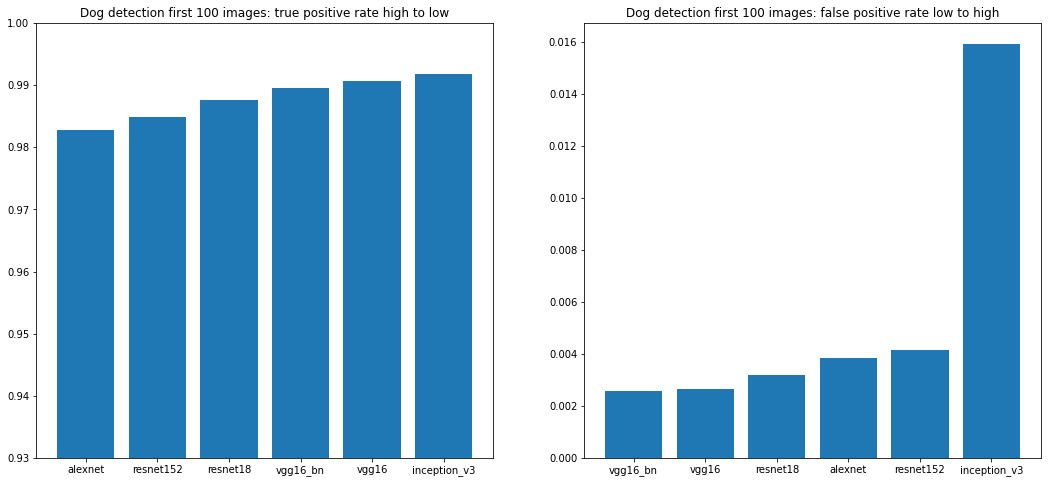

In [43]:
# visualize all networks. 
idx_tp = np.argsort(true_positive_accuracy)           # (descending order)
idx_fp = np.argsort(false_positive_accuracy)          # (accending order)

fig,ax = plt.subplots(1,2,figsize = (18,8))
ax[0].bar([model_names[i] for i in idx_tp],true_positive_accuracy[idx_tp])
ax[0].set_title("Dog detection first 100 images: true positive rate high to low")
ax[0].set_ylim((0.93,1.0))
ax[1].bar([model_names[i] for i in idx_fp],false_positive_accuracy[idx_fp])
ax[1].set_title("Dog detection first 100 images: false positive rate low to high")
plt.show()

For, whole dataset.

In [41]:
vgg16 = vgg16.to('cpu')                                                        # its for later use 
torch.cuda.empty_cache()                                                       # free some memory, because now we will train other 5 models
true_positive_accuracy = np.zeros(len(model_list))                              # initialize list
false_positive_accuracy = np.zeros(len(model_list))
for i in range(len(model_list)):
  model = model_list[i].to(device)                                                                                         # attension to model with index i
  true_positive_accuracy[i] = np.mean([dog_detector(img_path, model, device = device) for img_path in dog_files])                  # update list according to resultant accuracy
  false_positive_accuracy[i] = np.mean([dog_detector(img_path,model,device = device) for img_path in human_files])
  model = model.to("cpu")

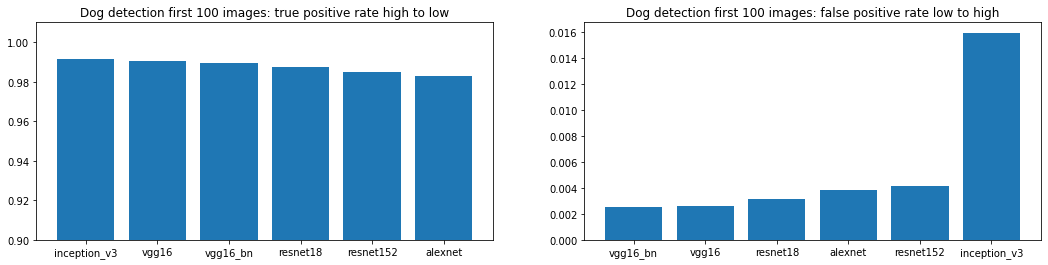

In [42]:
# visualize all networks. 
idx_tp = np.argsort(true_positive_accuracy)[::-1]      #(descending order)
idx_fp = np.argsort(false_positive_accuracy)          # (accending order)

fig,ax = plt.subplots(1,2,figsize = (18,4))
ax[0].bar([model_names[i] for i in idx_tp],true_positive_accuracy[idx_tp])
ax[0].set_title("Dog detection first 100 images: true positive rate high to low")
ax[0].set_ylim((0.9,1.01))
ax[1].bar([model_names[i] for i in idx_fp],false_positive_accuracy[idx_fp])
ax[1].set_title("Dog detection first 100 images: false positive rate low to high")
plt.show()

In [ ]:
# Keep Learning, Enjoy Empowering. 